In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif

In [2]:
data = pd.read_csv('CIC-IoTIDS2022.csv')

In [3]:
data

,Src Port,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50145,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
1,50143,554,6,6,7,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
2,50148,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
3,50147,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
4,50144,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797323,39378,443,6,0,3,0.0,64.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
797324,443,39378,6,1,1,64.0,0.0,64.0,64.0,64.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
797325,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
797326,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
data['Label'].value_counts()
"""
Normal        409375
HTTPFlood     311675
TCPFlood       41606
BruteForce     28522
UDPFlood        6150
"""


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797328 entries, 0 to 797327
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src Port           797328 non-null  int64  
 1   Dst Port           797328 non-null  int64  
 2   Protocol           797328 non-null  int64  
 3   Tot Fwd Pkts       797328 non-null  int64  
 4   Tot Bwd Pkts       797328 non-null  int64  
 5   TotLen Fwd Pkts    797328 non-null  float64
 6   TotLen Bwd Pkts    797328 non-null  float64
 7   Fwd Pkt Len Max    797328 non-null  float64
 8   Fwd Pkt Len Min    797328 non-null  float64
 9   Fwd Pkt Len Mean   797328 non-null  float64
 10  Fwd Pkt Len Std    797328 non-null  float64
 11  Bwd Pkt Len Max    797328 non-null  float64
 12  Bwd Pkt Len Min    797328 non-null  float64
 13  Bwd Pkt Len Mean   797328 non-null  float64
 14  Bwd Pkt Len Std    797328 non-null  float64
 15  Flow Byts/s        794705 non-null  float64
 16  Fl

In [5]:
data = data.dropna()

In [6]:
data = data.reset_index()

In [7]:
data.drop('index',axis=1,inplace=True)
data

,Src Port,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50145,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
1,50143,554,6,6,7,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
2,50148,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
3,50147,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
4,50144,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BruteForce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794700,39378,443,6,0,3,0.0,64.0,0.0,0.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
794701,443,39378,6,1,1,64.0,0.0,64.0,64.0,64.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
794702,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
794703,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [8]:
label = data['Label']
data.drop('Label',axis=1, inplace=True)

le = preprocessing.LabelEncoder()
Label = pd.DataFrame(le.fit_transform(label),columns=['Label'])

In [9]:
data

,Src Port,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50145,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50143,554,6,6,7,370.0,284.0,256.0,0.0,61.666667,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50148,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50147,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50144,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794700,39378,443,6,0,3,0.0,64.0,0.0,0.0,0.000000,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794701,443,39378,6,1,1,64.0,0.0,64.0,64.0,64.000000,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794702,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794703,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
Label['Label'].value_counts() 

2    406778
1    311659
3     41605
0     28522
4      6141
Name: Label, dtype: int64

In [11]:
def remove_constant_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]
drop_col = remove_constant_value_features(data)
drop_col

['Fwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Cnt',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Init Fwd Win Byts',
 'Fwd Seg Size Min']

In [12]:
new_df_columns = [e for e in data.columns if e not in drop_col]
new_df = data[new_df_columns]
new_df

,Src Port,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50145,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50143,554,6,6,7,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50148,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50147,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50144,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794700,39378,443,6,0,3,0.0,64.0,0.0,0.0,0.000000,...,47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794701,443,39378,6,1,1,64.0,0.0,64.0,64.0,64.000000,...,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794702,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794703,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
new_df.corr()

,Src Port,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Src Port,1.000000,-0.688187,-0.284044,0.035422,-0.000296,0.031635,-0.002183,0.024747,-0.082346,0.050729,...,0.036634,0.040751,-0.017839,0.007786,-0.008098,-0.022962,-0.157570,-0.086138,-0.163331,-0.151341
Dst Port,-0.688187,1.000000,0.272402,-0.027214,0.001994,-0.028234,0.003455,-0.019295,0.048049,-0.047562,...,-0.062030,-0.029710,0.010535,0.007197,0.010220,0.010611,0.070018,-0.023705,0.066404,0.072269
Protocol,-0.284044,0.272402,1.000000,0.072746,-0.005590,-0.009328,-0.002444,-0.094847,0.228123,-0.043578,...,-0.186437,0.080643,0.068083,0.087595,0.094844,0.043563,-0.130866,0.000296,-0.128582,-0.129210
Tot Fwd Pkts,0.035422,-0.027214,0.072746,1.000000,0.252748,0.303029,0.248976,0.014580,0.027195,0.023664,...,-0.016124,0.963893,0.093558,0.173753,0.140440,0.035922,0.006654,0.106922,0.023944,-0.002815
Tot Bwd Pkts,-0.000296,0.001994,-0.005590,0.252748,1.000000,0.045579,0.997950,0.016596,0.005940,0.015586,...,-0.001140,0.004607,0.059520,0.001847,0.045206,0.067572,-0.002273,0.003893,-0.001911,-0.002655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.022962,0.010611,0.043563,0.035922,0.067572,0.031612,0.065848,0.056572,0.092920,0.069170,...,0.085178,0.021924,0.944918,0.218555,0.797843,1.000000,0.027500,0.071813,0.035817,0.021154
Idle Mean,-0.157570,0.070018,-0.130866,0.006654,-0.002273,-0.020622,-0.001532,-0.014638,0.019013,-0.048758,...,0.008519,0.007437,0.020385,-0.009186,0.007800,0.027500,1.000000,0.114904,0.994755,0.995297
Idle Std,-0.086138,-0.023705,0.000296,0.106922,0.003893,0.023035,0.003619,0.039304,0.034268,0.019010,...,0.145559,0.109108,0.084232,0.058155,0.083045,0.071813,0.114904,1.000000,0.210769,0.022286
Idle Max,-0.163331,0.066404,-0.128582,0.023944,-0.001911,-0.016331,-0.001210,-0.010962,0.021970,-0.045965,...,0.023421,0.025171,0.030681,-0.001080,0.018552,0.035817,0.994755,0.210769,1.000000,0.981367


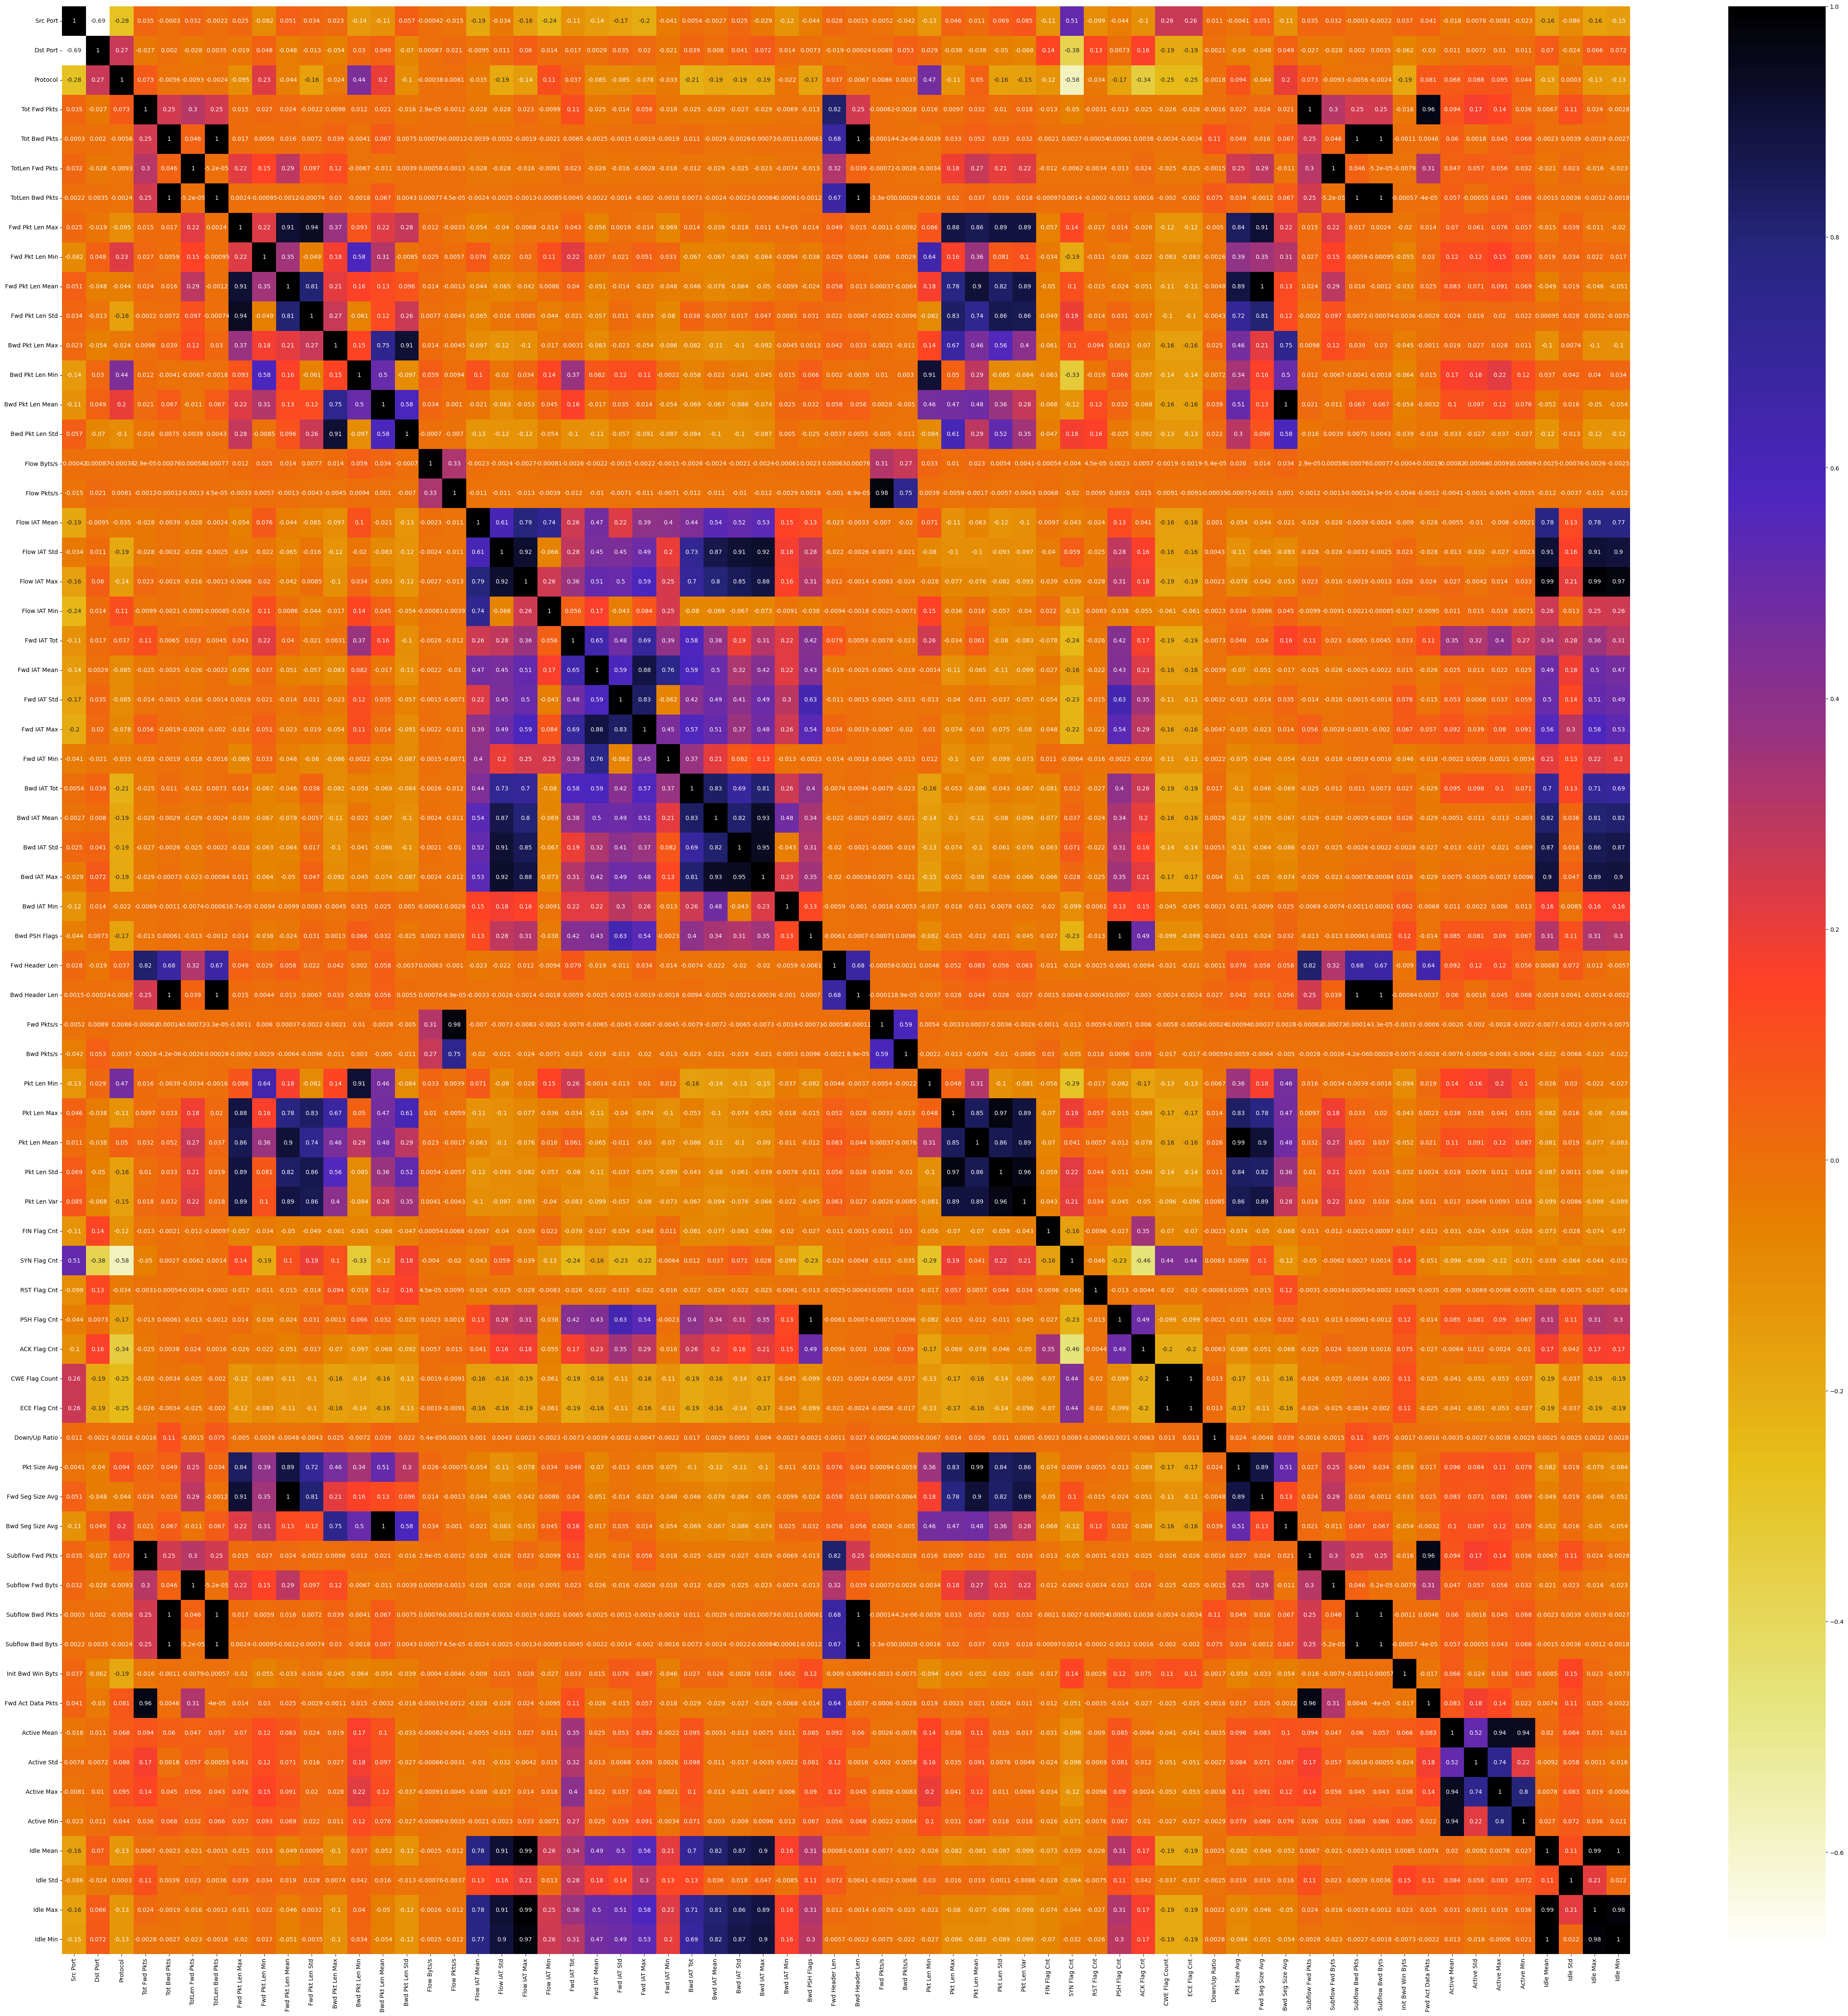

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(60,60))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    col_corr2 = set()# Set of all the names of correlated columns
    col_corr3 = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]# getting the name of column
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname)
                col_corr2.add(colname2)
                a = dataset[colname].corr(Label['Label'])
                b = dataset[colname2].corr(Label['Label'])
                if(a<b):
                    col_corr3.add(colname)
                else:
                    col_corr3.add(colname2)
                
    return col_corr,col_corr2,col_corr3

In [16]:
corr_feat_row_side,corr_feat_col_side,corr_features_final  = correlation(new_df, 0.8)

In [17]:
corr_features_final

{'Active Mean',
 'Active Min',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd PSH Flags',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'ECE Flag Cnt',
 'Flow IAT Std',
 'Fwd Header Len',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Pkts/s',
 'Fwd Seg Size Avg',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Subflow Bwd Byts',
 'Subflow Fwd Pkts',
 'Tot Bwd Pkts',
 'Tot Fwd Pkts',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts'}

In [18]:
new_df

,Src Port,Dst Port,Protocol,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50145,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50143,554,6,6,7,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50148,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50147,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50144,554,6,6,6,370.0,284.0,256.0,0.0,61.666667,...,972,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794700,39378,443,6,0,3,0.0,64.0,0.0,0.0,0.000000,...,47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794701,443,39378,6,1,1,64.0,0.0,64.0,64.0,64.000000,...,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794702,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
794703,443,39378,6,1,1,64.0,64.0,64.0,64.0,64.000000,...,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
remove_features = list(corr_features_final)
preprocessed_features = new_df.drop(remove_features, axis=1,inplace=False)

In [20]:
preprocessed_features

,Src Port,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,...,CWE Flag Count,Down/Up Ratio,Pkt Size Avg,Subflow Fwd Byts,Subflow Bwd Pkts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Std,Active Max,Idle Std
0,50145,554,6,0.0,142.0,0.0,47.333333,2126.801603,39.023883,2.795491e+04,...,0,1.0,54.500000,370,6,972,3,0.0,0.0,0.0
1,50143,554,6,0.0,142.0,0.0,40.571429,1649.773724,32.793667,3.303483e+04,...,0,1.0,50.307692,370,7,972,3,0.0,0.0,0.0
2,50148,554,6,0.0,142.0,0.0,47.333333,2101.488394,38.559420,2.829164e+04,...,0,1.0,54.500000,370,6,972,3,0.0,0.0,0.0
3,50147,554,6,0.0,142.0,0.0,47.333333,1948.347926,35.749503,3.051536e+04,...,0,1.0,54.500000,370,6,972,3,0.0,0.0,0.0
4,50144,554,6,0.0,142.0,0.0,47.333333,1991.200962,36.535797,2.985864e+04,...,0,1.0,54.500000,370,6,972,3,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794700,39378,443,6,0.0,33.0,0.0,21.333333,183381.088825,8595.988539,1.745000e+02,...,0,0.0,32.333333,0,3,47,0,0.0,0.0,0.0
794701,443,39378,6,64.0,0.0,0.0,0.000000,271.112919,8.472279,2.360640e+05,...,0,1.0,32.000000,64,1,47,1,0.0,0.0,0.0
794702,443,39378,6,64.0,64.0,64.0,64.000000,135.589342,2.118583,9.440270e+05,...,0,1.0,96.000000,64,1,47,1,0.0,0.0,0.0
794703,443,39378,6,64.0,64.0,64.0,64.000000,33.789429,0.527960,3.788167e+06,...,0,1.0,96.000000,64,1,47,1,0.0,0.0,0.0


In [21]:
data = preprocessed_features
mutual_info = mutual_info_classif(data, Label)
mutual_info

C:\Users\monav\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.47274806, 0.67672806, 0.38382977, 0.13171257, 0.51781971,
       0.36569753, 0.51849672, 0.38737535, 0.55343978, 0.5640225 ,
       0.61571443, 0.43617577, 0.30344641, 0.30447133, 0.20335057,
       0.55274656, 0.35751944, 0.61005847, 0.00340366, 0.2920643 ,
       0.00313957, 0.04114638, 0.00768828, 0.12349815, 0.21673139,
       0.58346254, 0.34226665, 0.30692531, 0.76360774, 0.19234697,
       0.07782682, 0.14890556, 0.11928443])

<AxesSubplot:xlabel='Features', ylabel='Dependency Score'>

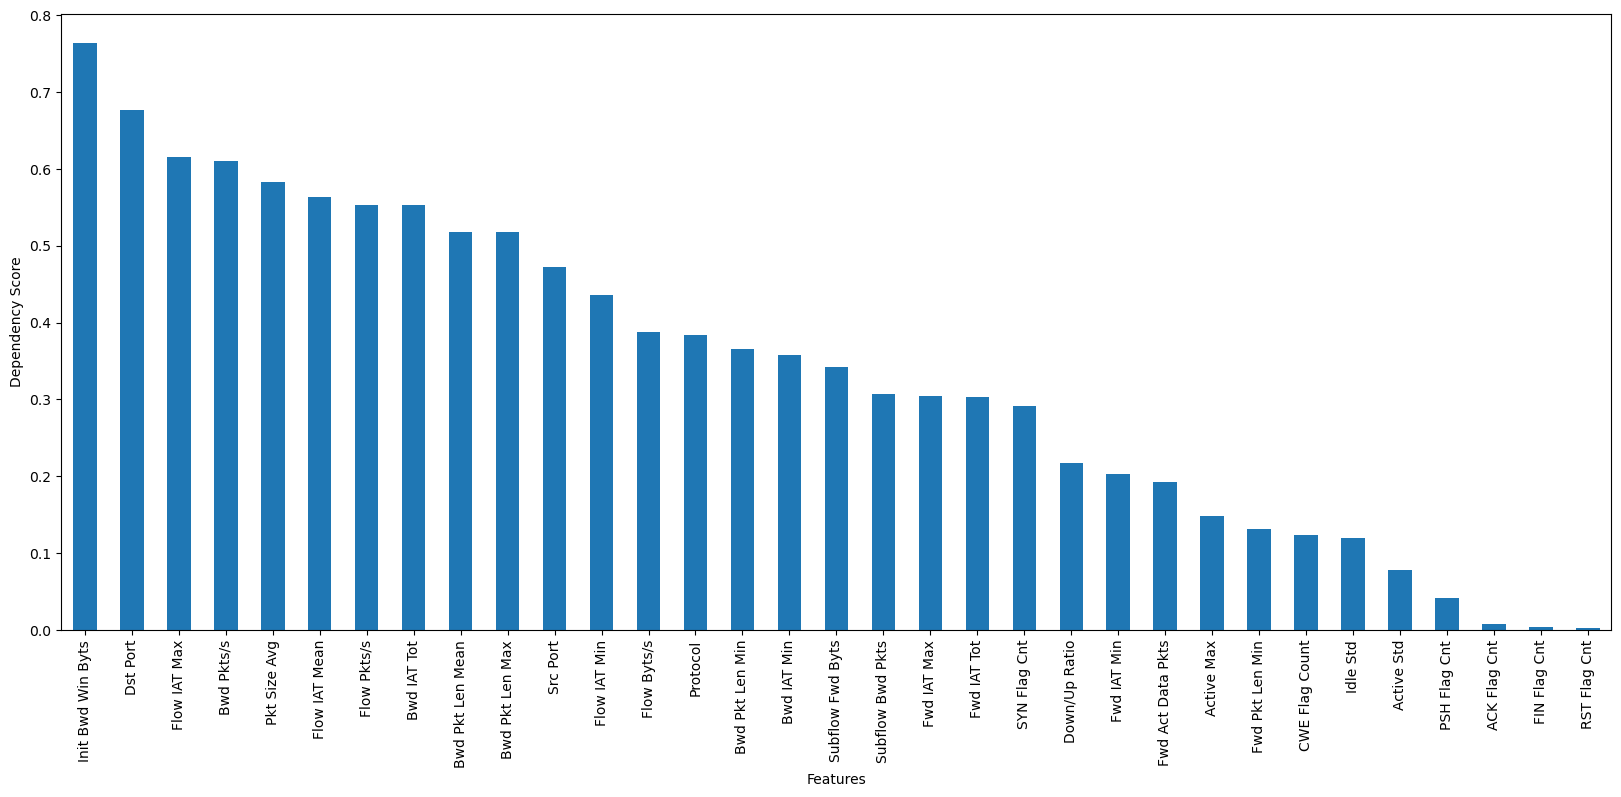

In [30]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = data.columns
mutual_info.sort_values(ascending=False)
plt.ylabel("Dependency Score")
plt.xlabel("Features")     

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
for i in mutual_info.index:
    if(mutual_info[i]<0.1):
        del(mutual_info[i]) 
        del(i)

In [32]:
mutual_info.index

Index(['Src Port', 'Dst Port', 'Protocol', 'Fwd Pkt Len Min',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Min', 'Bwd Pkts/s', 'SYN Flag Cnt', 'CWE Flag Count',
       'Down/Up Ratio', 'Pkt Size Avg', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Max', 'Idle Std'],
      dtype='object')

In [33]:
data = data[mutual_info.index]

In [34]:
data

,Src Port,Dst Port,Protocol,Fwd Pkt Len Min,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,...,SYN Flag Cnt,CWE Flag Count,Down/Up Ratio,Pkt Size Avg,Subflow Fwd Byts,Subflow Bwd Pkts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Max,Idle Std
0,50145,554,6,0.0,142.0,0.0,47.333333,2126.801603,39.023883,2.795491e+04,...,1,0,1.0,54.500000,370,6,972,3,0.0,0.0
1,50143,554,6,0.0,142.0,0.0,40.571429,1649.773724,32.793667,3.303483e+04,...,1,0,1.0,50.307692,370,7,972,3,0.0,0.0
2,50148,554,6,0.0,142.0,0.0,47.333333,2101.488394,38.559420,2.829164e+04,...,1,0,1.0,54.500000,370,6,972,3,0.0,0.0
3,50147,554,6,0.0,142.0,0.0,47.333333,1948.347926,35.749503,3.051536e+04,...,1,0,1.0,54.500000,370,6,972,3,0.0,0.0
4,50144,554,6,0.0,142.0,0.0,47.333333,1991.200962,36.535797,2.985864e+04,...,1,0,1.0,54.500000,370,6,972,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794700,39378,443,6,0.0,33.0,0.0,21.333333,183381.088825,8595.988539,1.745000e+02,...,0,0,0.0,32.333333,0,3,47,0,0.0,0.0
794701,443,39378,6,64.0,0.0,0.0,0.000000,271.112919,8.472279,2.360640e+05,...,0,0,1.0,32.000000,64,1,47,1,0.0,0.0
794702,443,39378,6,64.0,64.0,64.0,64.000000,135.589342,2.118583,9.440270e+05,...,0,0,1.0,96.000000,64,1,47,1,0.0,0.0
794703,443,39378,6,64.0,64.0,64.0,64.000000,33.789429,0.527960,3.788167e+06,...,0,0,1.0,96.000000,64,1,47,1,0.0,0.0


In [ ]:
Label['Label']

In [ ]:
final_data = data.join(Label)
final_data

In [ ]:
#final_data.to_csv("preprocessedCIC_ToN_IoT.csv",index = False)